In [98]:
import pandas as pd
import plotly.graph_objects as go
import plotly

import os

In [99]:
river = pd.read_csv("SRR8369860.txt", sep = "\t")
river["sample"] = "river"

microplastic = pd.read_csv("SRR8369862.txt", sep = "\t")
microplastic["sample"] = "microplastic"

rock = pd.read_csv("SRR8369863.txt", sep = "\t")
rock["sample"] = "rock"

In [100]:
frames = [river, microplastic, rock]
df1 = pd.concat(frames)

In [101]:
df1.groupby("sample").size()

sample
microplastic    129
river            65
rock            111
dtype: int64

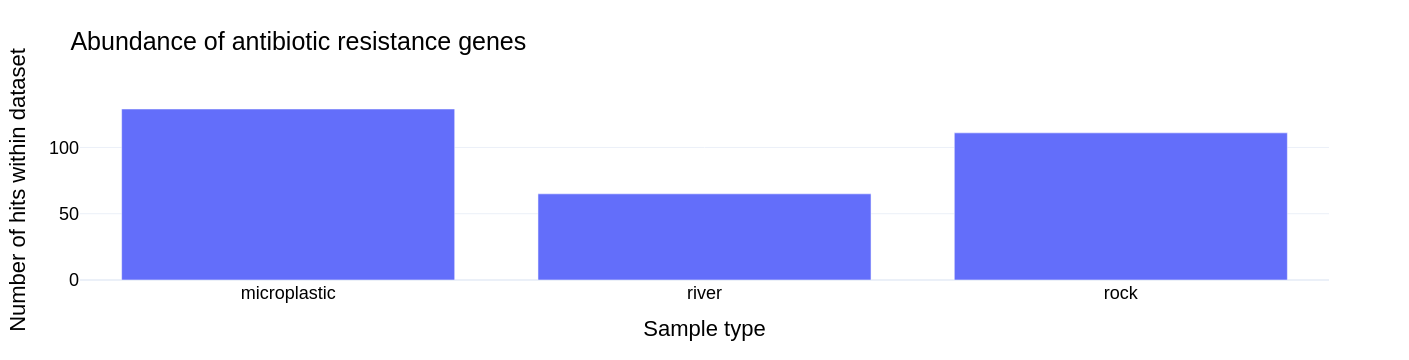

[5566:0203/203902.833290:ERROR:buffer_manager.cc(488)] [.DisplayCompositor]GL ERROR :GL_INVALID_OPERATION : glBufferData: <- error from previous GL command


In [124]:
counts = df1.groupby("sample").size()

fig = go.Figure()

fig.add_trace(go.Bar(x = counts.index.values, y = counts.values))

fig.update_layout(template = "plotly_white", 
                  title="Abundance of antibiotic resistance genes", 
                  xaxis_title="Sample type", 
                  yaxis_title="Number of hits within dataset",
                  font=dict(
                          #family="Courier New, monospace",
                          size=18,
                          color="#000000"
                           )
                  )

fig.show()

fig.write_image("abundance_barplot.pdf", width = 1200, height = 800)

In [104]:
def data_prep(input_df, index, normalize = True):
    input_df = input_df[["sample", index]]
    drugclassdict = {}
    for entry in set(input_df[index]):
        drugclassdict[entry] = []

    columns = []
    for sample in set(input_df["sample"]):
        columns.append(sample)
        df_subset = input_df[input_df["sample"] == sample]
        drugvals  = df_subset[index].value_counts()

        for entry in set(input_df[index]):
            if entry in drugvals.index:
                drugclassdict[entry].append(int(drugvals[entry]))
            else:
                drugclassdict[entry].append(0)

    drugsdf = pd.DataFrame.from_dict(drugclassdict, orient='index', columns = columns)
    
    if normalize:
        drugsdf = drugsdf/drugsdf.sum(axis=0)
    
    return drugsdf

In [105]:
df1

,ORF_ID,Contig,Start,Stop,Orientation,Cut_Off,Pass_Bitscore,Best_Hit_Bitscore,Best_Hit_ARO,Best_Identities,...,AMR Gene Family,Predicted_DNA,Predicted_Protein,CARD_Protein_Sequence,Percentage Length of Reference Sequence,ID,Model_ID,Nudged,Note,sample
0,k141_1295_2 # 733 # 1068 # -1 # ID=1291_2;part...,k141_1295_2,733,1068,-,Strict,200,224.600,RbpA,96.40,...,RbpA bacterial RNA polymerase-binding protein,ATGGCTGATCGTGTGCTCAGGGGCAGCCGGCTCGGAGCTGTGAGCT...,MADRVLRGSRLGAVSYETDRNHDLAPRQVARYRTENGEEFDVPFAD...,MADRVLRGSRLGAVSYETDRNHDLAPRQVARYRTDNGEEFDVPFAD...,97.37,gnl|BL_ORD_ID|1341|hsp_num:0,1425,NaN,NaN,river
1,k141_7062_1 # 2 # 172 # 1 # ID=7052_1;partial=...,k141_7062_1,2,172,+,Strict,750,100.500,mefC,100.00,...,major facilitator superfamily (MFS) antibiotic...,AGTTTGGCAGTTTTGCCAAGTGTAATCGGTTTATTATTCACAGGCC...,SLAVLPSVIGLLFTGLIAEVIGVNITFIISGCLAILVGILSFSTRN...,MENRKWFKTYMFIWAGQFASMLTSYAVQFAIVIWLSLEYKSAEVLA...,13.76,gnl|BL_ORD_ID|2102|hsp_num:0,2262,True,loose hit with at least 95 percent identity pu...,river
2,k141_7062_2 # 177 # 323 # 1 # ID=7052_2;partia...,k141_7062_2,177,323,+,Strict,500,103.600,mphG,100.00,...,macrolide phosphotransferase (MPH),ATGAAAAATAGAGATATTCAAAAATTAGCGGAAAGAAATGGGTTAA...,MKNRDIQKLAERNGLILSDEMSFNEMGIDFKVGFATDRDGTKWLLRIPR,MKNRDIQKLAERNGLILSDEMSFNEMGIDFKVGFATDRDGTKWLLR...,16.67,gnl|BL_ORD_ID|2089|hsp_num:0,2259,True,loose hit with at least 95 percent identity pu...,river
3,k141_25873_2 # 425 # 3583 # 1 # ID=25836_2;par...,k141_25873_2,425,3583,+,Strict,750,831.600,adeF,44.62,...,resistance-nodulation-cell division (RND) anti...,ATGAGTGAGTTTTTTATAAGAAGACCCATCTTCGCCATCGTTATTT...,MSEFFIRRPIFAIVISILIVIMGLLTMLGIPVSKYPEITPPMVQVT...,MNISKFFIDRPIFAGVLSVLILLAGLLSVFQLPISEYPEVVPPSVV...,99.34,gnl|BL_ORD_ID|138|hsp_num:0,153,NaN,NaN,river
4,k141_45875_12 # 16715 # 19897 # 1 # ID=45801_1...,k141_45875_12,16715,19897,+,Strict,750,958.400,adeF,48.82,...,resistance-nodulation-cell division (RND) anti...,ATGCTTTCTCGTTTCTTTATCGATCGTCCGATTTTTGCAGCGGTCA...,MLSRFFIDRPIFAAVISILITLAGLVFVWQLPIAQYPEITPPTVQV...,MNISKFFIDRPIFAGVLSVLILLAGLLSVFQLPISEYPEVVPPSVV...,100.09,gnl|BL_ORD_ID|138|hsp_num:0,153,NaN,NaN,river
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,k141_924473_2 # 169 # 1353 # 1 # ID=916623_2;p...,k141_924473_2,169,1353,+,Strict,700,708.800,Escherichia coli EF-Tu mutants conferring resi...,87.02,...,elfamycin resistant EF-Tu,ATGGCTAAAGCTAAATTTGAACGTTCTAAGCCCCATGTTAACGTGG...,MAKAKFERSKPHVNVGTIGHVDHGKTTLTAAISHVLAKTYGGEAKD...,MLSPEGESTIVRNIAVSKEKFERTKPHVNVGTIGHVDHGKTTLTAA...,96.33,gnl|BL_ORD_ID|2022|hsp_num:0,2158,NaN,NaN,rock
107,k141_445753_3 # 1413 # 1847 # 1 # ID=445491_3;...,k141_445753_3,1413,1847,+,Strict,210,266.200,Escherichia coli marR mutant conferring antibi...,88.19,...,resistance-nodulation-cell division (RND) anti...,GTGAAAAGCACCAGTGACCTCTTCAACGAAATCATTCCGCTGGGTC...,VKSTSDLFNEIIPLGRLIYMVNQKKDRLLNDYLSPLDITATQFKVL...,MKSTSDLFNEIIPLGRLIHMVNQKKDRLLNEYLSPLDITAAQFKVL...,100.00,gnl|BL_ORD_ID|2040|hsp_num:0,431,NaN,NaN,rock
108,k141_1040710_5 # 2970 # 3404 # -1 # ID=1032786...,k141_1040710_5,2970,3404,-,Strict,210,264.600,Escherichia coli marR mutant conferring antibi...,88.19,...,resistance-nodulation-cell division (RND) anti...,GTGAAAAGCACCAGTGATCTGTTTAACGAAATCATCCCACTCGGTC...,VKSTSDLFNEIIPLGRLIHMVNQKKDRLLNDYLSPMDITASQFKTL...,MKSTSDLFNEIIPLGRLIHMVNQKKDRLLNEYLSPLDITAAQFKVL...,100.00,gnl|BL_ORD_ID|2040|hsp_num:0,431,NaN,NaN,rock
109,3646_5918 | model_type_id: 40295 | pass_bit_sc...,k141_1022087,1,240,+,Strict,5300,385.223,Neisseria gonorrhoeae 23S rRNA with mutation c...,95.45,...,23S rRNA with mutation conferring resistance t...,AGTGATCCGGTGGTTCTGTATGGAAGGGCCATCGCTCAACGGATAA...,NaN,NaN,8.21,gnl|BL_ORD_ID|1014176|hsp_num:0,3646,True,loose hit with at least 95 percent identity pu...,rock


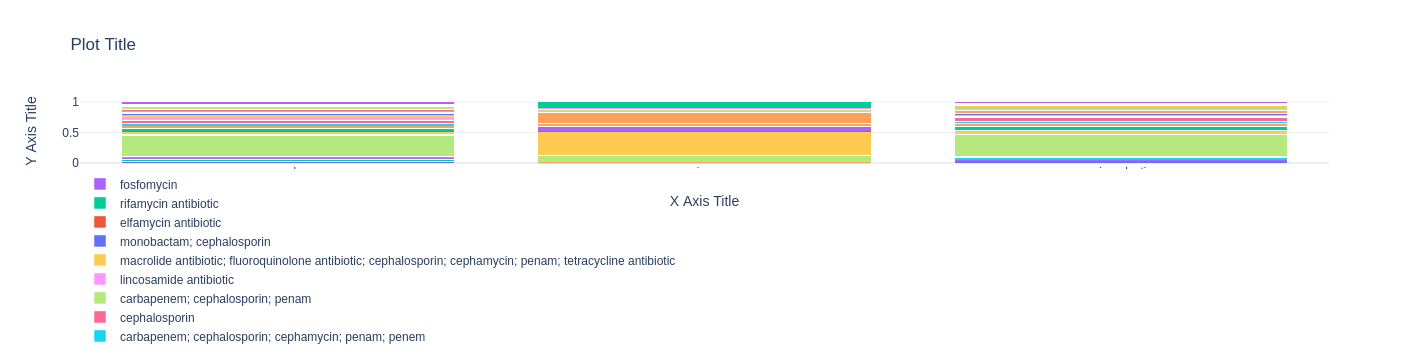

In [111]:
df_out = data_prep(input_df = df1, index = "Drug Class")

fig = go.Figure()

for index, row in df_out.iterrows():
    fig.add_trace(go.Bar(x = row.index, y = row.values, name = row.name))

fig.update_layout(barmode='stack')
    
#fig.update_layout(legend= dict(yanchor="top", orientation="h",))
#fig.update_layout(legend= dict(yanchor="top", orientation="h",))

fig.update_layout(template = "plotly_white",
                  #showlegend=False, 
                  title="Plot Title", 
                  xaxis_title="X Axis Title", 
                  yaxis_title="Y Axis Title",)

fig.write_image("stacked_barplot.png", width = 800, height = 800)

fig.show()

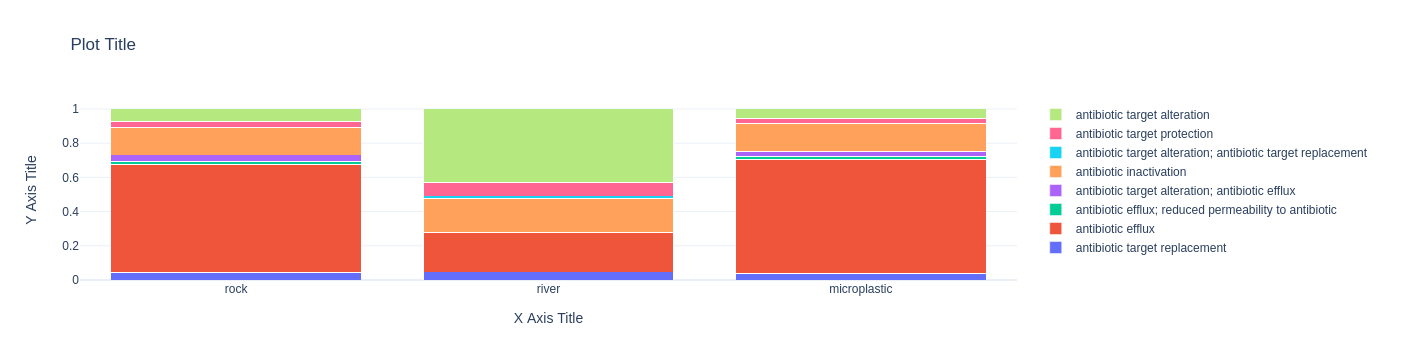

In [109]:
df_out = data_prep(input_df = df1, index = "Resistance Mechanism")

fig = go.Figure()

for index, row in df_out.iterrows():
    fig.add_trace(go.Bar(x = row.index, y = row.values, name = row.name))

fig.update_layout(barmode='stack')
    
#fig.update_layout(legend= dict(yanchor="top", orientation="h",))
fig.update_layout(legend= dict(yanchor="top", orientation="h",))

fig.update_layout(template = "plotly_white",
                  #showlegend=False, 
                  title="Plot Title", 
                  xaxis_title="X Axis Title", 
                  yaxis_title="Y Axis Title",)

fig.show()
#fig.write_image("stacked_barplot.png", width = 800, height = 1500)


[5566:0203/203525.713949:ERROR:buffer_manager.cc(488)] [.DisplayCompositor]GL ERROR :GL_INVALID_OPERATION : glBufferData: <- error from previous GL command


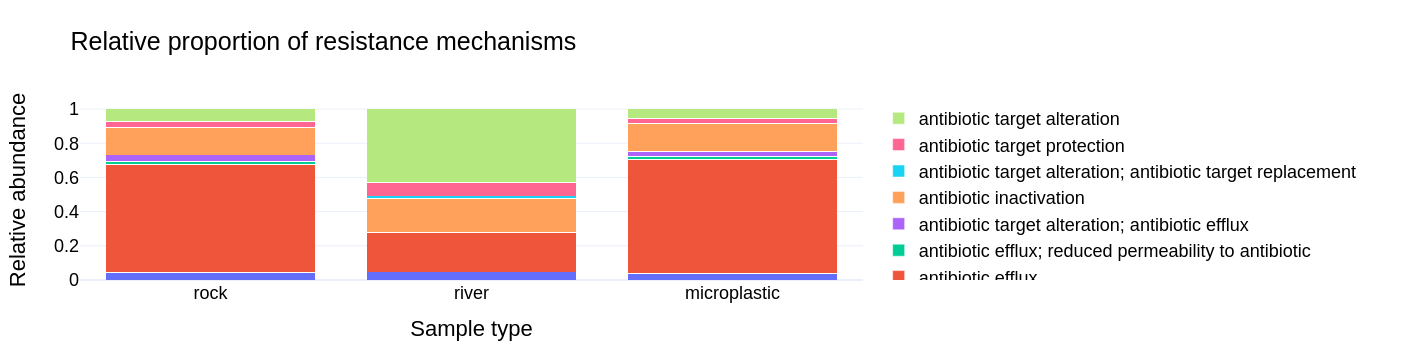

In [122]:
df_out = data_prep(input_df = df1, index = "Resistance Mechanism")

fig = go.Figure()

for index, row in df_out.iterrows():
    fig.add_trace(go.Bar(x = row.index, y = row.values, name = row.name))

fig.update_layout(barmode='stack')
    
#fig.update_layout(legend= dict(yanchor="top", orientation="h",))
#fig.update_layout(legend= dict(yanchor="top", orientation="h",))

fig.update_layout(template = "plotly_white",
                  #showlegend=False, 
                  title="Relative proportion of resistance mechanisms", 
                  xaxis_title="Sample type", 
                  yaxis_title="Relative abundance",
                  font=dict(
                          #family="Courier New, monospace",
                          size=18,
                          color="#000000"
                           )
                 )

#fig.write_image("stacked_barplot.png", width = 800, height = 800)
fig.write_image("stacked_barplot.pdf", width = 1200, height = 800)

fig.show()